In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
import seaborn as sns
%matplotlib inline

In [77]:
confirmed=pd.read_csv("time_series_covid-19_confirmed.csv")
deaths=pd.read_csv("time_series_covid-19_deaths.csv")
recovered=pd.read_csv("time_series_covid-19_recovered.csv")

In [78]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [79]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [81]:
cols=confirmed.keys()

In [82]:
confirmed_cols=confirmed.loc[:,cols[4]:cols[-1]]

In [83]:
deaths_cols=deaths.loc[:,cols[4]:cols[-1]]


In [84]:
recovered_cols=recovered.loc[:,cols[4]:cols[-1]]

In [85]:
confirmed_cols.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [147]:
world_case=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
dates=confirmed_cols.keys()
for i in dates:
    confirmedsum=confirmed_cols[i].sum()
    deathsum=deaths_cols[i].sum()
    recoveredsum=recovered_cols[i].sum()
    world_case.append(confirmedsum)
    total_deaths.append(deathsum)
    mortality_rate.append(deathsum/confirmedsum)
    total_recovered.append(recoveredsum)
    
    

In [148]:
confirmedsum

167449

In [149]:
deathsum


6440

In [150]:
recoveredsum

76034

In [151]:
days=np.array([i for i in range(len(dates))]).reshape(-1,1)

In [152]:
days

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [153]:
world_case

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [154]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3348,
 3460,
 3558,
 3802,
 3988,
 4262,
 4615,
 4720,
 5404,
 5819,
 6440]

In [155]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58358,
 60694,
 62494,
 64404,
 67003,
 68324,
 70251,
 72624,
 76034]

In [156]:
days_in_future=30
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-30]

In [157]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [158]:
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_days=[]
for i in range (len(future_forecast)):
    future_forecast_days.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [159]:
latest_confirmed=confirmed[dates[-1]]

In [160]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, world_case, test_size=0.15, shuffle=False)



In [161]:
latest_deaths=deaths[dates[-1]]

In [162]:
latest_recoveries=recovered[dates[-1]]



In [163]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [164]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [165]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [166]:
unique_countries=list(confirmed['Country/Region'].unique())

In [167]:
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [168]:
country_confirmed_cases=[]
no_cases=[]

In [169]:
for i in unique_countries:
    cases=latest_confirmed[confirmed['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        

        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed['Country/Region']==unique_countries[i]].sum()

In [170]:
print("CONFIRMED CASES BY COUNTRIES")
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]}')

CONFIRMED CASES BY COUNTRIES
China:81003
Italy:24747
Iran:13938
Korea, South:8162
Spain:7798
Germany:5795
France:4513
US:3499
Switzerland:2200
Norway:1221
United Kingdom:1144
Netherlands:1135
Sweden:1022
Belgium:886
Denmark:875
Austria:860
Japan:839
Cruise Ship:696
Malaysia:428
Qatar:401
Greece:331
Australia:297
Czechia:253
Canada:252
Israel:251
Portugal:245
Finland:244
Singapore:226
Slovenia:219
Bahrain:214
Estonia:171
Iceland:171
Brazil:162
Philippines:140
Romania:131
Ireland:129
Poland:119
Indonesia:117
Iraq:116
Thailand:114
India:113
Kuwait:112
Egypt:110
Lebanon:110
Saudi Arabia:103
San Marino:101
United Arab Emirates:98
Chile:74
Russia:63
Luxembourg:59
Taiwan*:59
Vietnam:56
Slovakia:54
Pakistan:53
South Africa:51
Bulgaria:51
Brunei:50
Croatia:49
Algeria:48
Serbia:48
Argentina:45
Peru:43
Panama:43
Albania:42
Mexico:41
Colombia:34
Georgia:33
Hungary:32
Latvia:30
Ecuador:28
Morocco:28
Belarus:27
Costa Rica:27
Armenia:26
Cyprus:26
Senegal:24
Bosnia and Herzegovina:24
Azerbaijan:23
Mol

In [171]:
unique_provinces=list(confirmed['Province/State'].unique())
outliers=['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [172]:
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

        
for i in no_cases:
    unique_provinces.remove(i)

In [173]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

British Columbia:73 cases
New South Wales:134 cases
Victoria:57 cases
Queensland:61 cases
South Australia:20 cases
Western Australia:17 cases
Tasmania:6 cases
Northern Territory:1 cases
Ontario:104 cases
Alberta:39 cases
Quebec:24 cases
Washington:643 cases
New York:732 cases
California:426 cases
Massachusetts:164 cases
Diamond Princess:742 cases
Grand Princess:23 cases
Georgia:99 cases
Colorado:131 cases
Florida:115 cases
New Jersey:98 cases
Oregon:36 cases
Texas:72 cases
Illinois:93 cases
Pennsylvania:66 cases
Iowa:18 cases
Maryland:32 cases
North Carolina:33 cases
South Carolina:28 cases
Tennessee:39 cases
Virginia:45 cases
Arizona:13 cases
Indiana:20 cases
Kentucky:20 cases
District of Columbia:16 cases
Nevada:24 cases
New Hampshire:13 cases
Minnesota:35 cases
Nebraska:17 cases
Ohio:37 cases
Rhode Island:20 cases
Wisconsin:32 cases
Connecticut:24 cases
Hawaii:6 cases
Oklahoma:7 cases
Utah:28 cases
Kansas:8 cases
Louisiana:91 cases
Missouri:5 cases
Vermont:8 cases
Alaska:1 cases
Ark

In [174]:
nan_indices=[]

In [175]:
for i in range (len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)
    

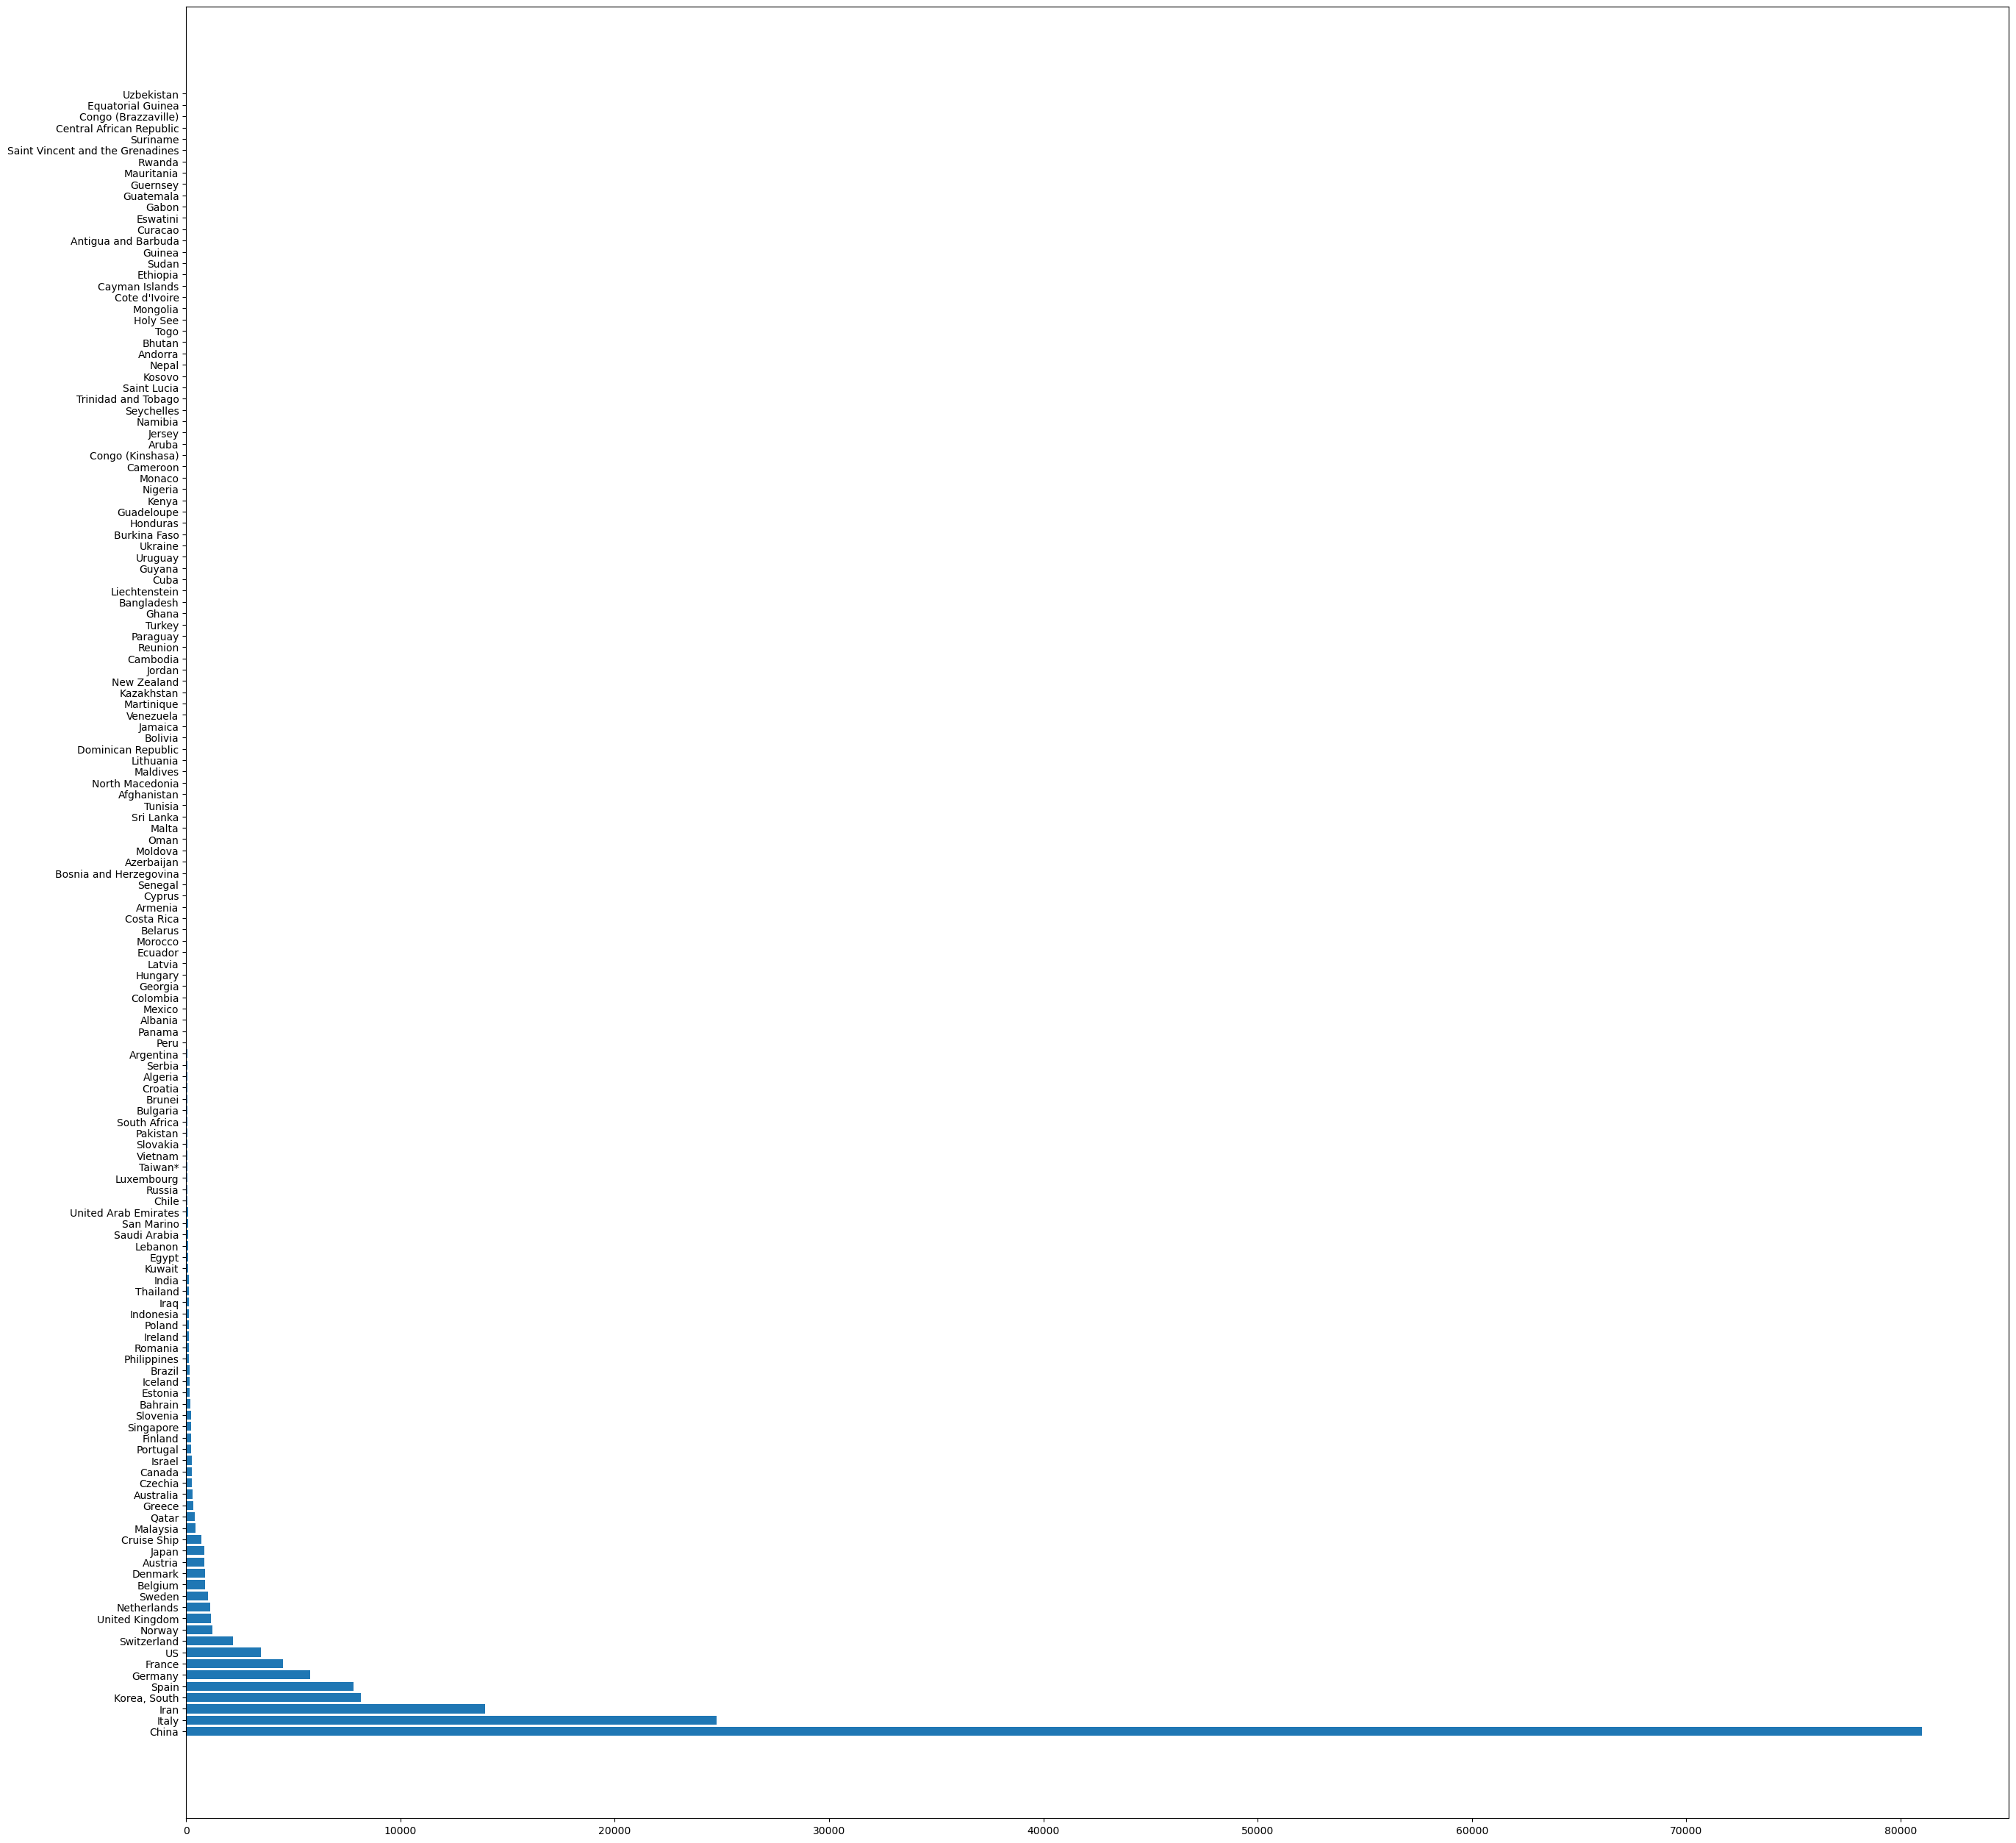

In [176]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.show()

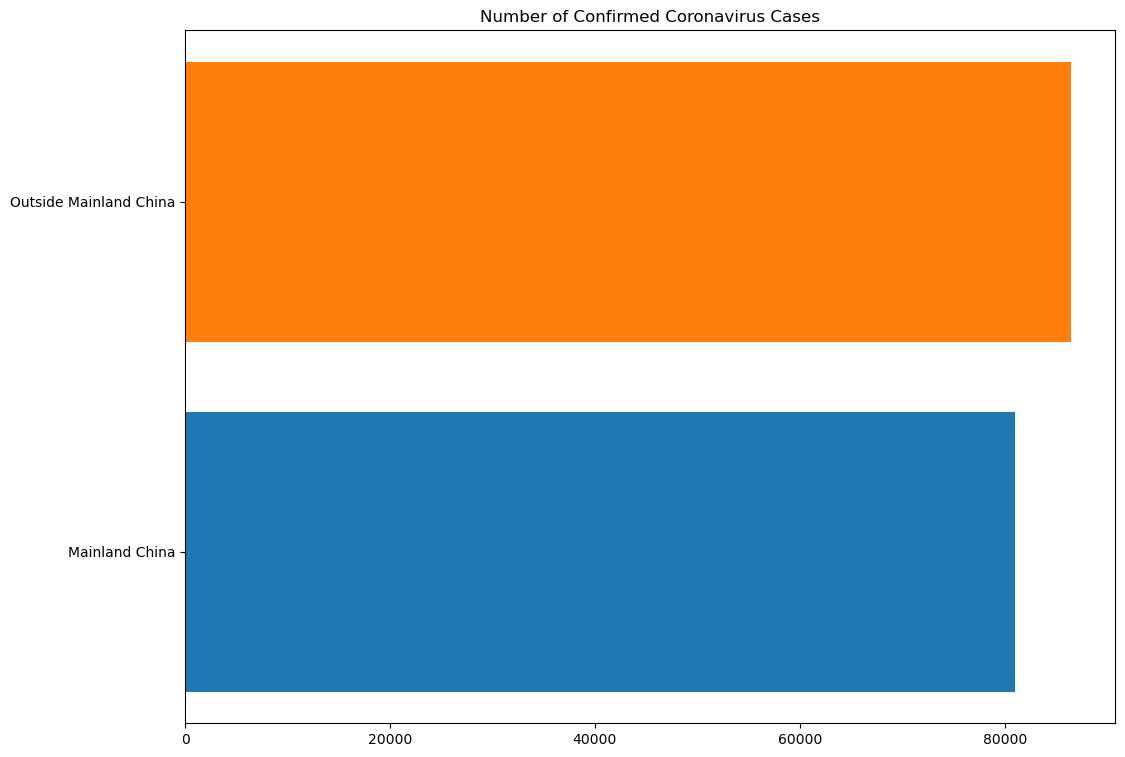

In [177]:
china_confirmed=latest_confirmed[confirmed['Country/Region']=='China'].sum()
outside_mainland_china_confirmed=np.sum(country_confirmed_cases)-china_confirmed
plt.figure(figsize=(12,9))
plt.barh('Mainland China',china_confirmed)

plt.barh('Outside Mainland China',outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()


In [178]:
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

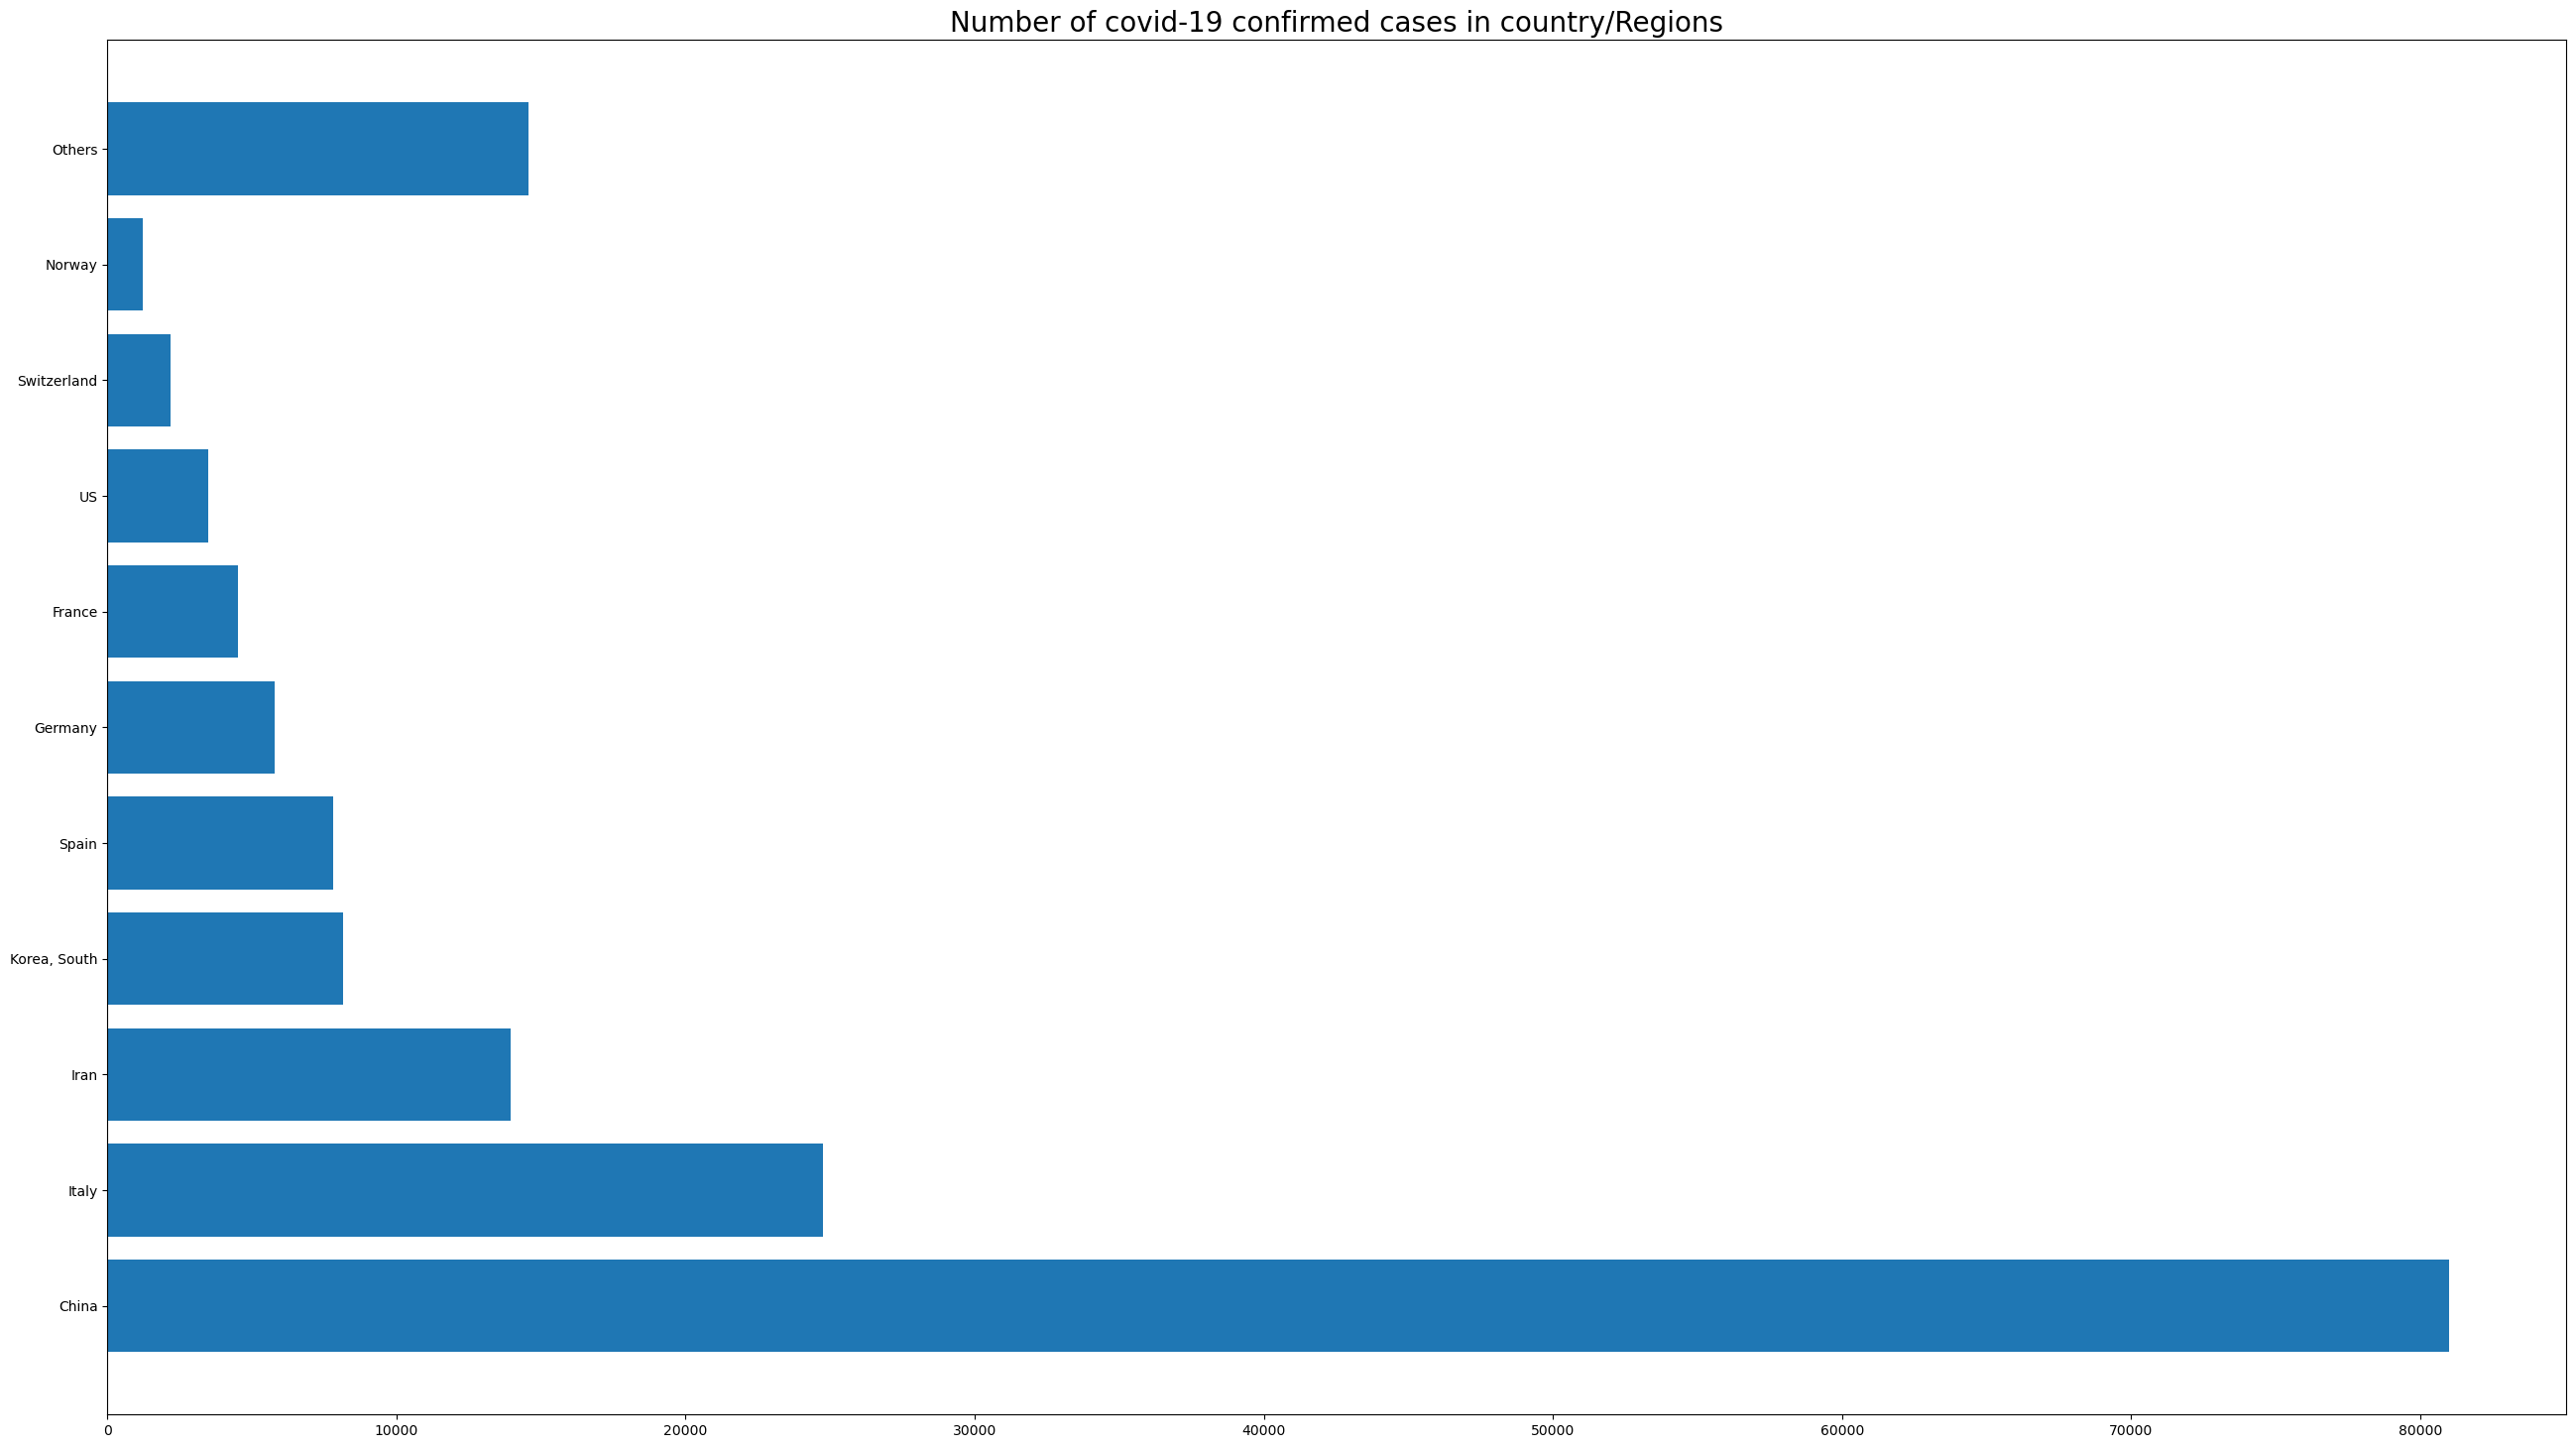

In [179]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of covid-19 confirmed cases in country/Regions',size=20)
plt.show()

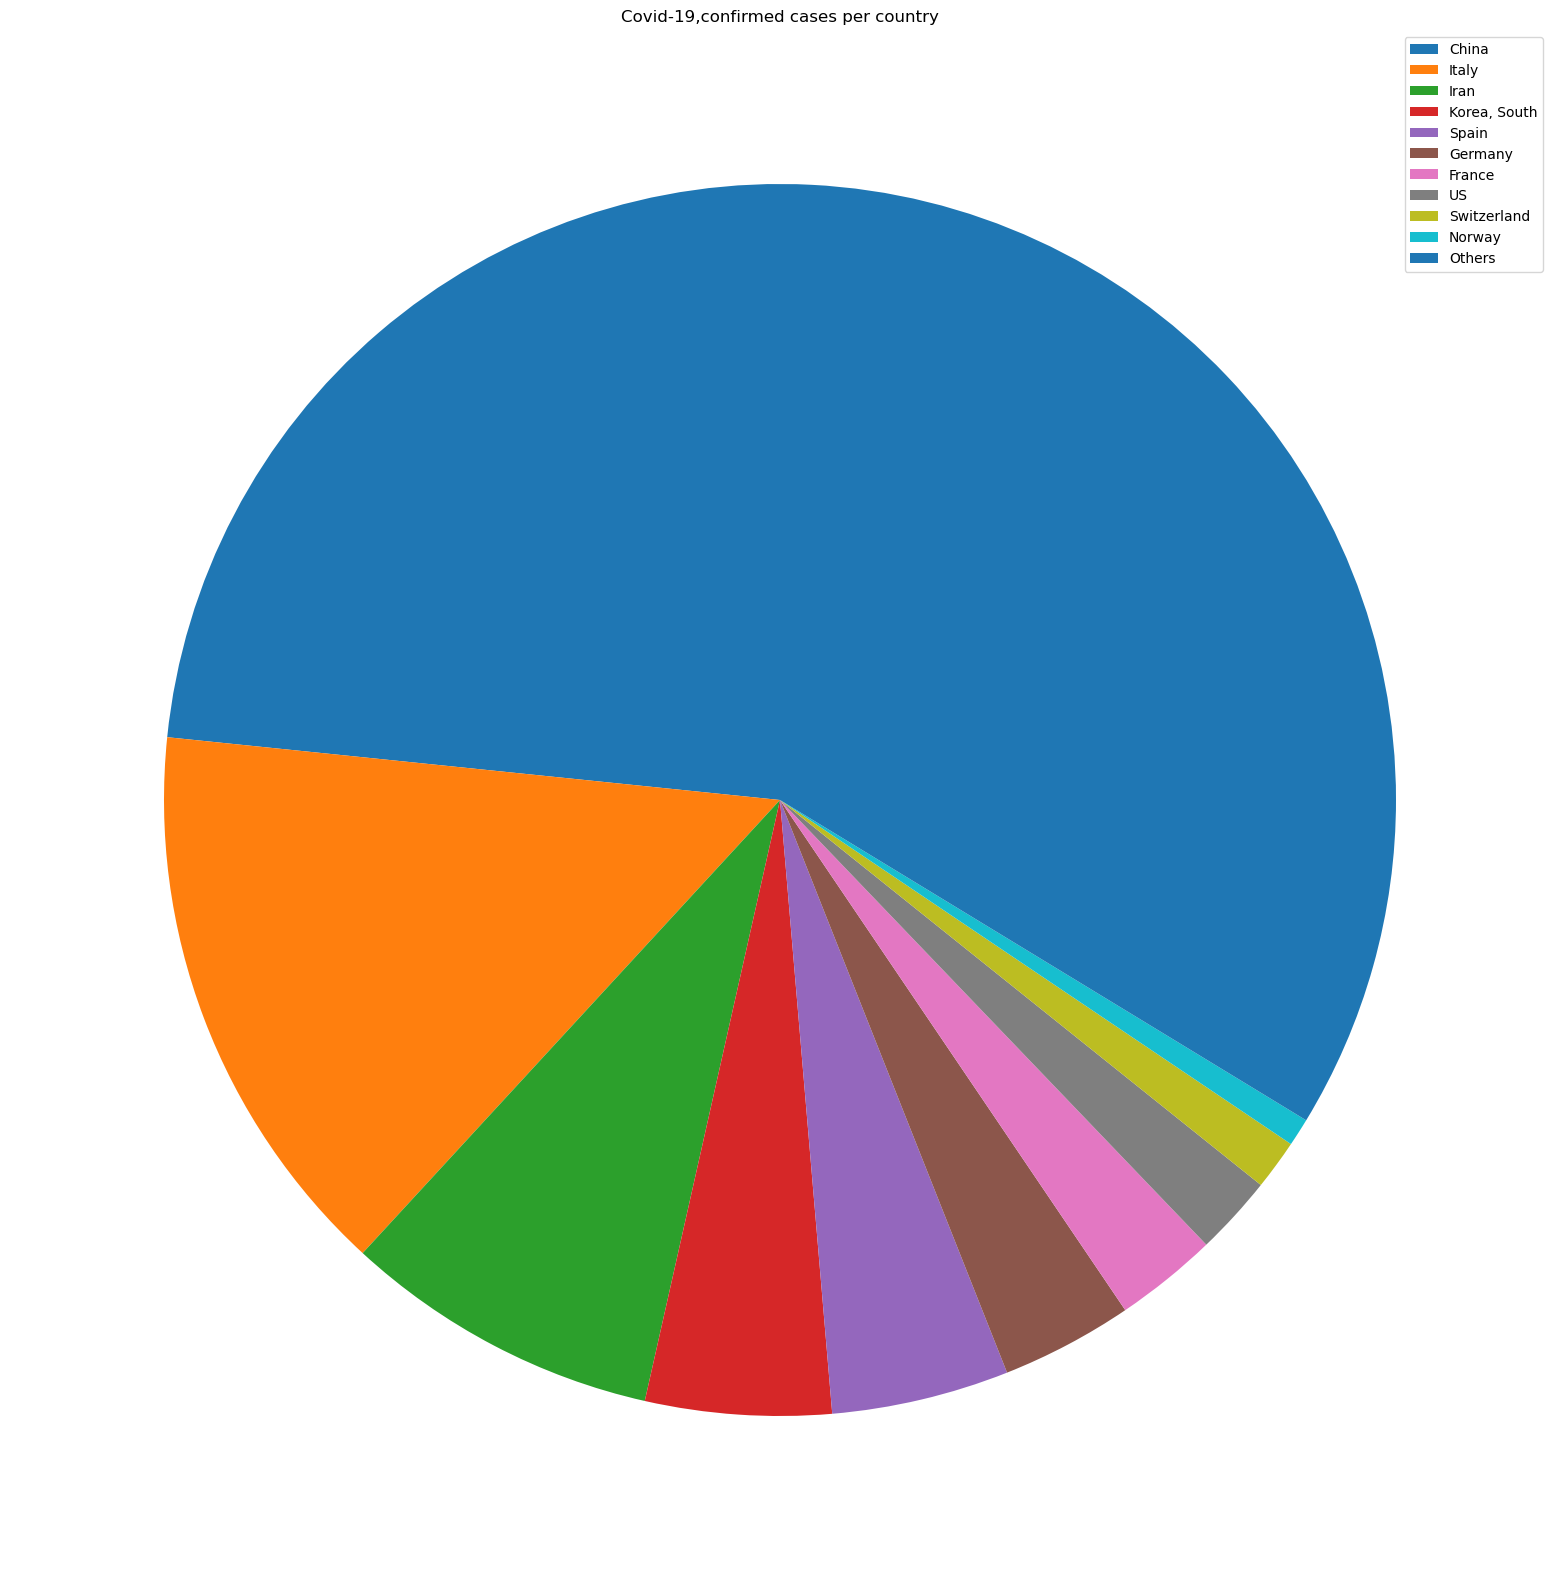

In [180]:
plt.figure(figsize=(20,20))
plt.title('Covid-19,confirmed cases per country')
plt.pie(visual_confirmed_cases)
plt.legend((visual_unique_countries))
plt.show()


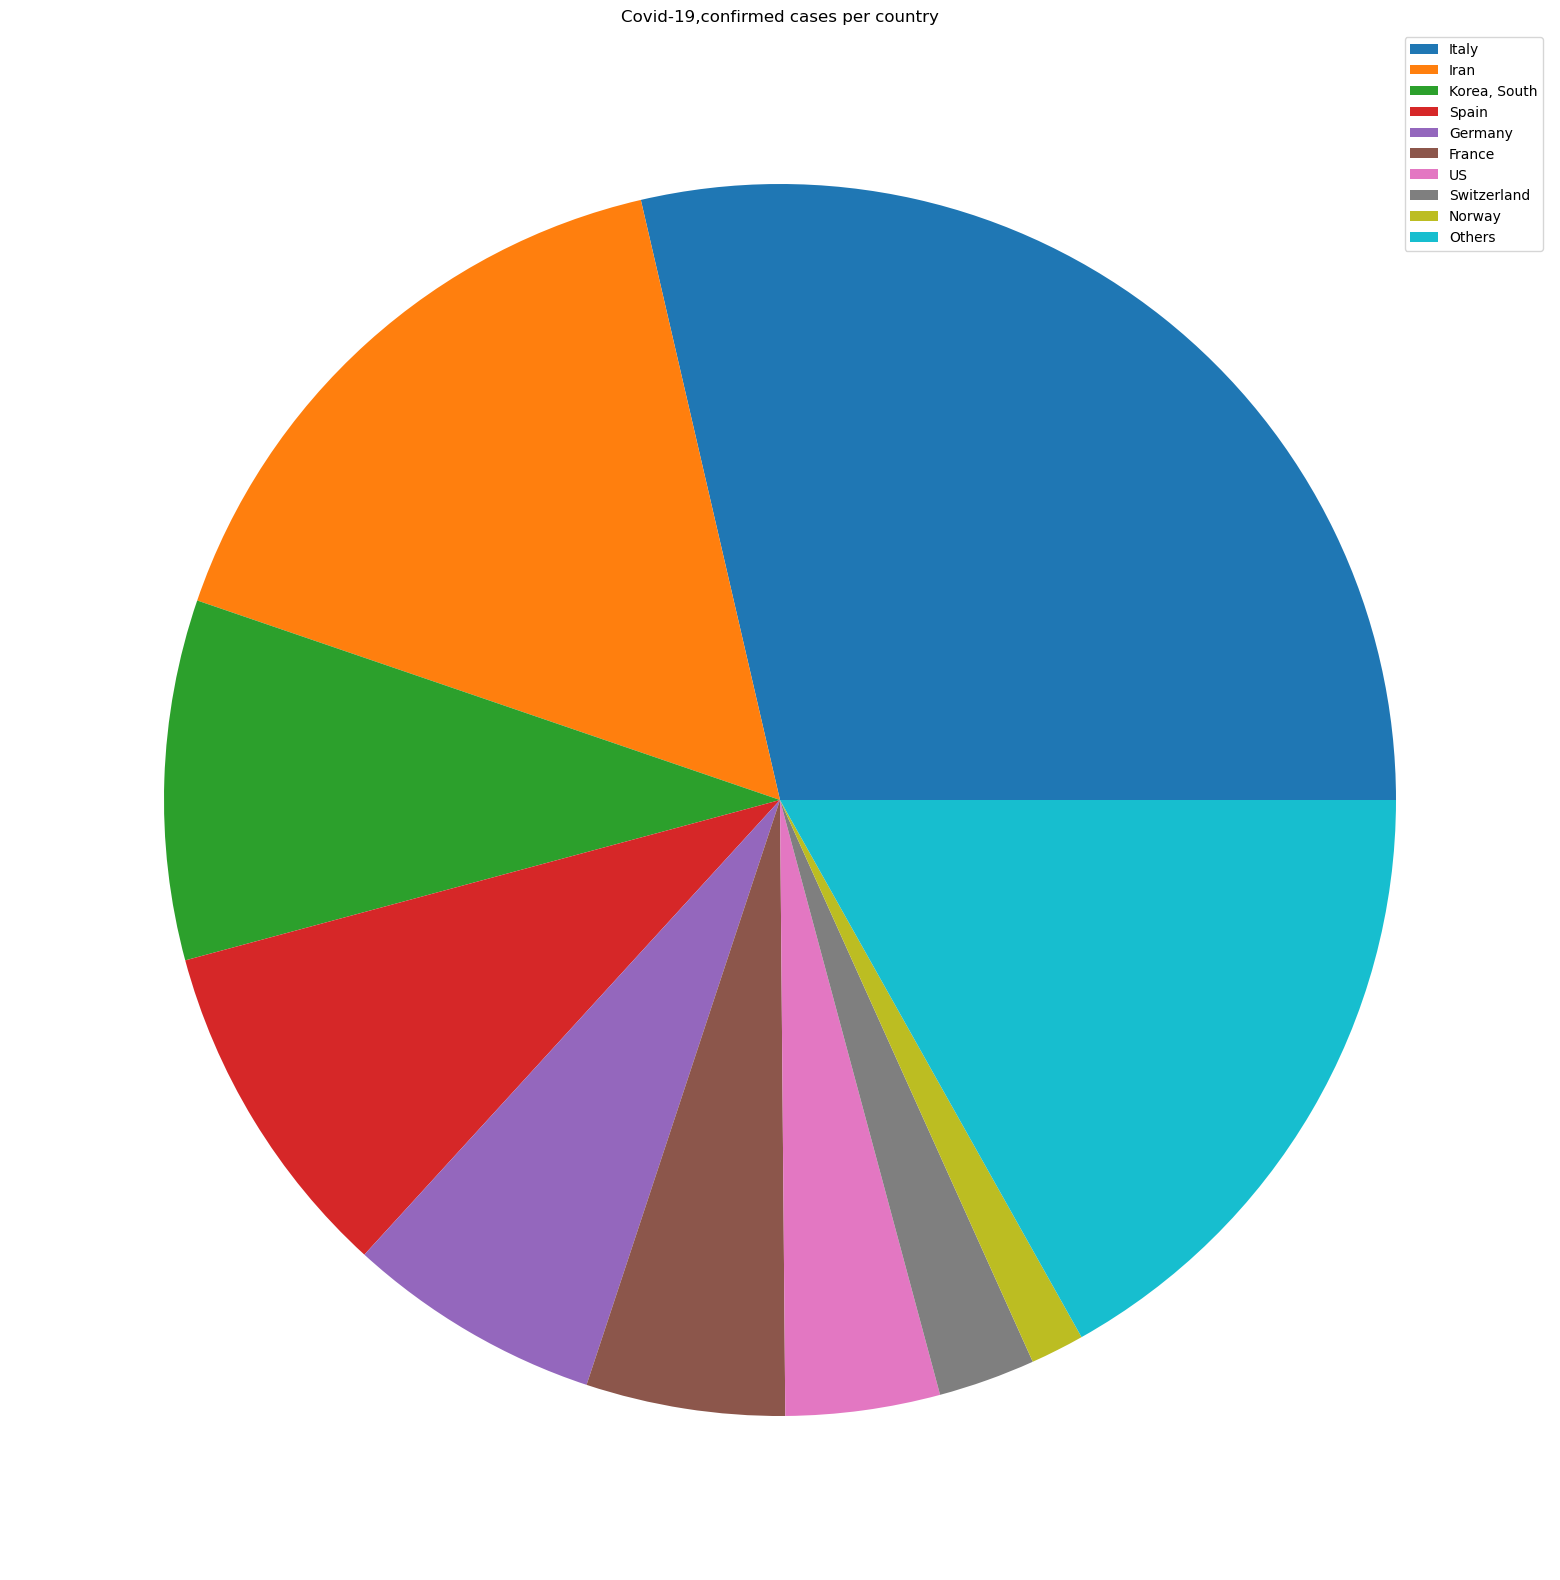

In [181]:
plt.figure(figsize=(20,20))
plt.title('Covid-19,confirmed cases per country')
plt.pie(visual_confirmed_cases[1:])
plt.legend((visual_unique_countries[1:]))
plt.show()


In [246]:
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
svm=SVR()

svm_search=RandomizedSearchCV(svm,svm_grid,scoring="neg_mean_squared_error",cv=10,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [247]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1, 'C': 0.01}

In [248]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [249]:
svm_confirmed

SVR(C=0.01, epsilon=1, gamma=0.1, kernel='poly')

In [250]:
svm_pred

array([ 30388.34440129,  30389.32185622,  30396.1640407 ,  30414.73568429,
        30450.90151654,  30510.52626702,  30599.47466527,  30723.61144085,
        30888.80132331,  31100.90904222,  31365.79932711,  31689.33690756,
        32077.38651311,  32535.81287332,  33070.48071775,  33687.25477594,
        34391.99977746,  35190.58045185,  36088.86152868,  37092.7077375 ,
        38207.98380786,  39440.55446933,  40796.28445144,  42281.03848376,
        43900.68129585,  45661.07761726,  47568.09217753,  49627.58970624,
        51845.43493293,  54227.49258716,  56779.62739848,  59507.70409644,
        62417.58741062,  65515.14207054,  68806.23280579,  72296.7243459 ,
        75992.48142043,  79899.36875894,  84023.25109098,  88369.99314611,
        92945.45965388,  97755.51534385, 102806.02494557, 108102.8531886 ,
       113651.86480248, 119458.92451679, 125529.89706107, 131870.64716488,
       138487.03955776, 145384.93896929, 152570.210129  , 160048.71776646,
       167826.32661123, 1

MAE 16263.289241035274
MSE 284717873.5156596


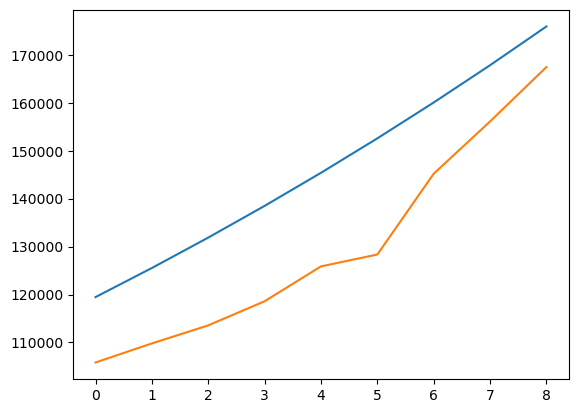

In [251]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE',mean_squared_error(svm_test_pred,y_test_confirmed))


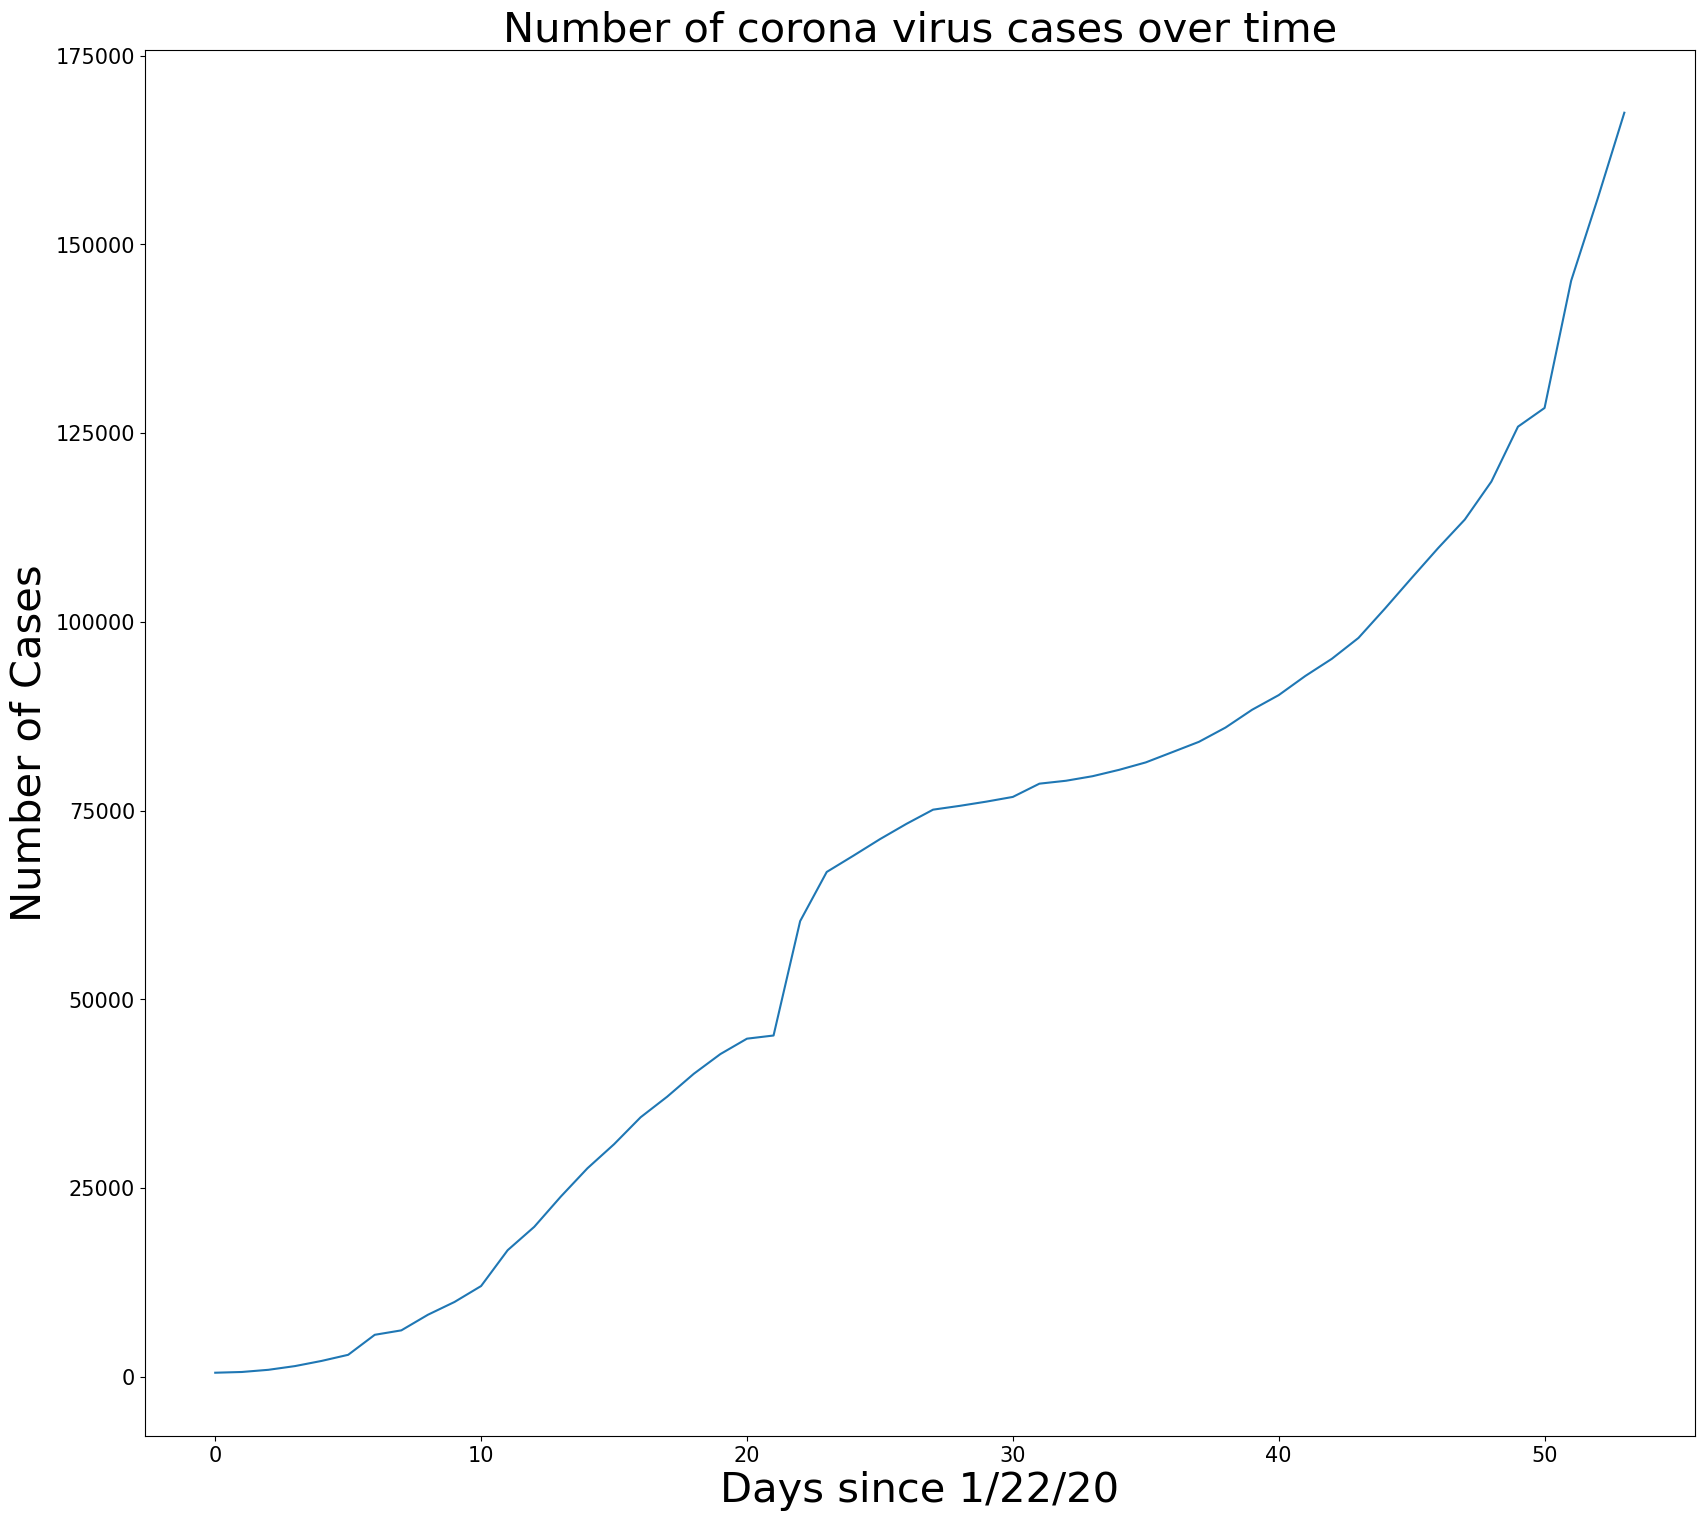

In [252]:
plt.figure(figsize=(20,18))
plt.plot(adjusted_dates,world_case)
plt.title("Number of corona virus cases over time",size=30)
plt.xlabel('Days since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()



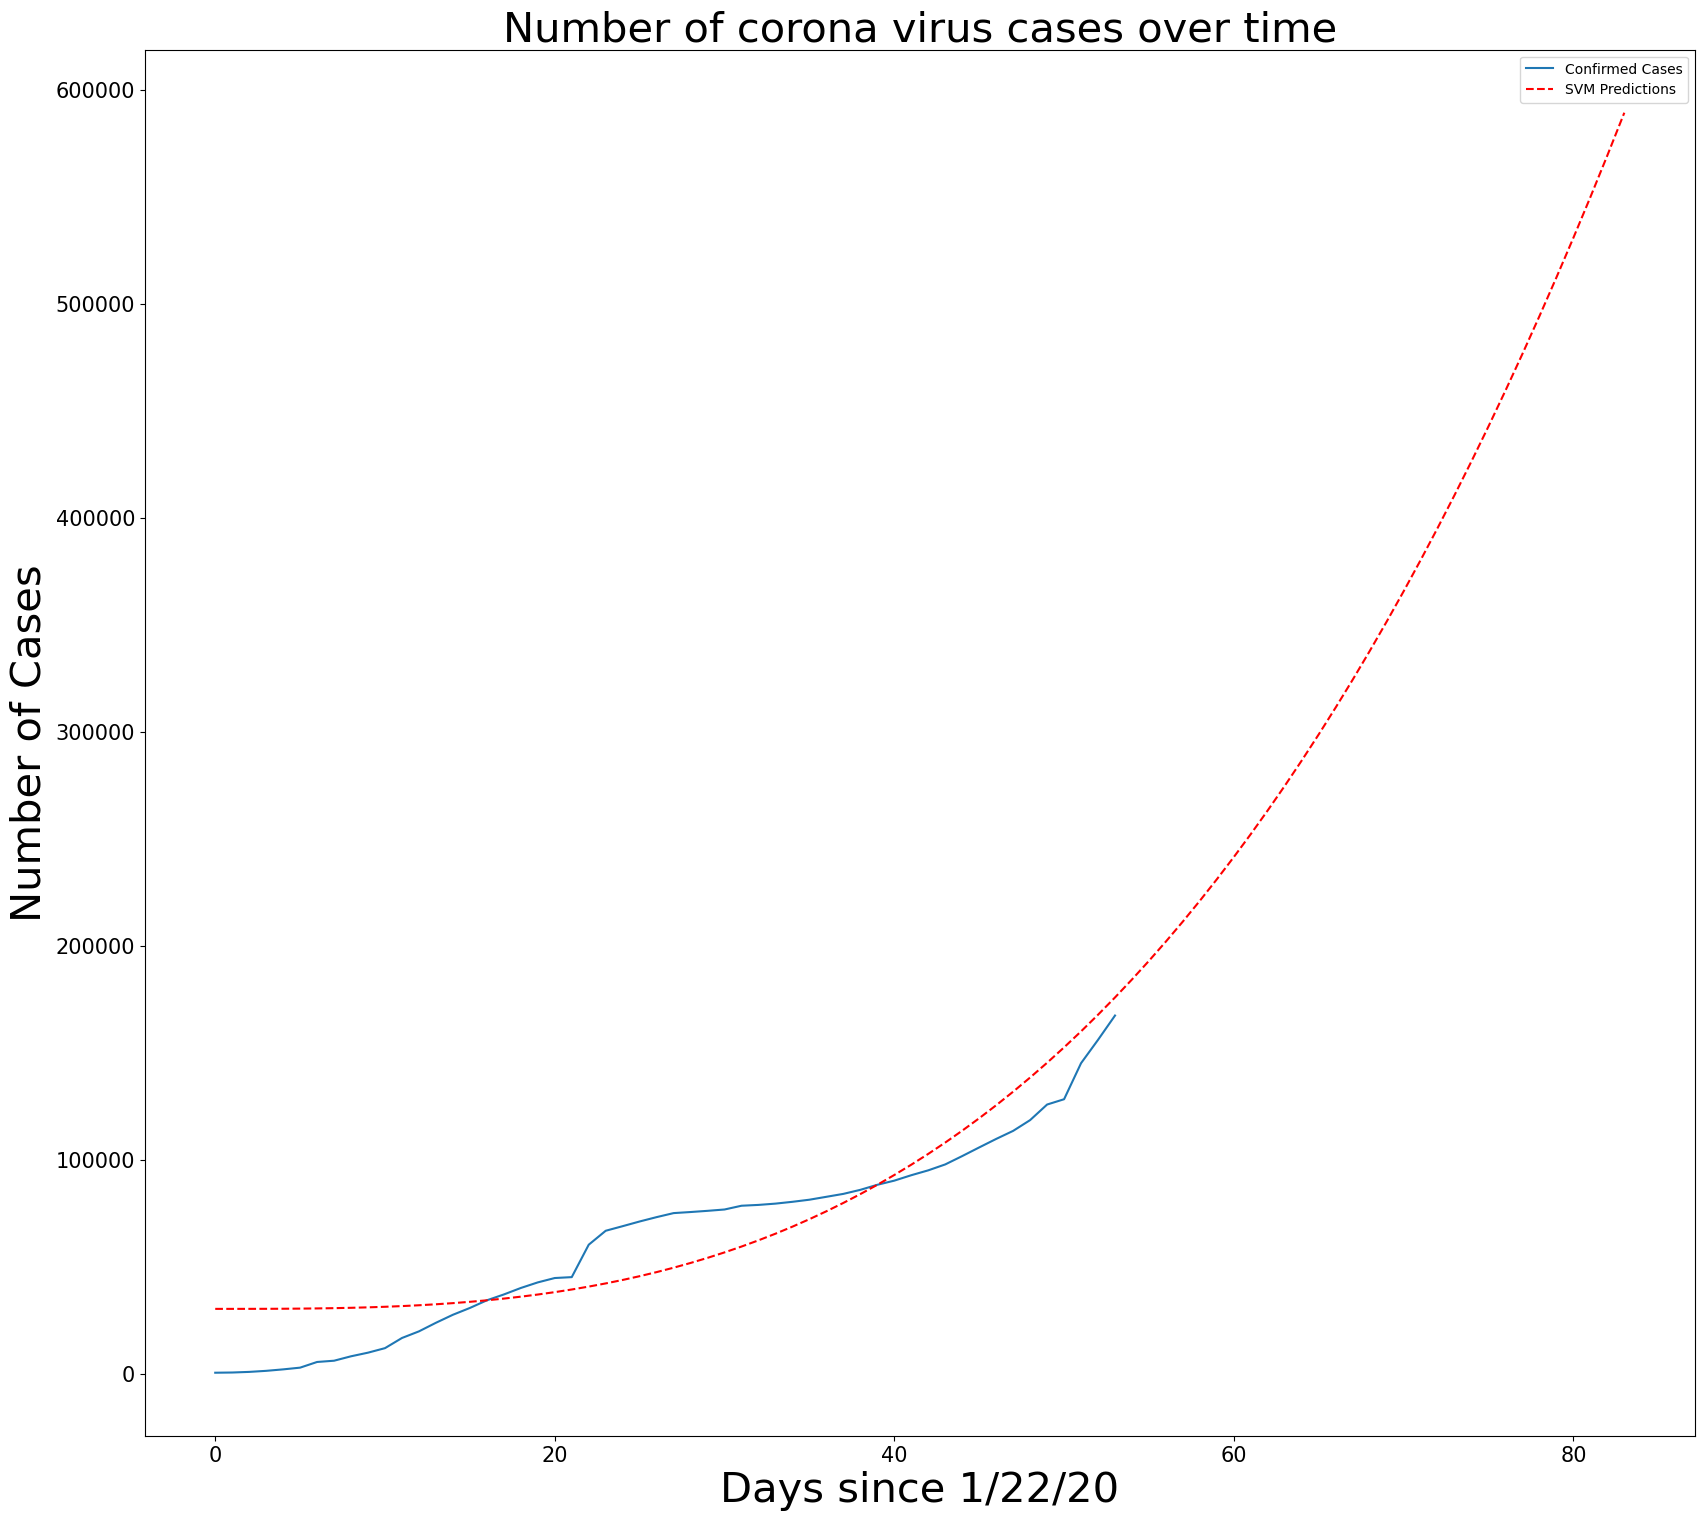

In [253]:
plt.figure(figsize=(20,18))
plt.plot(adjusted_dates,world_case)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title("Number of corona virus cases over time",size=30)
plt.xlabel('Days since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','SVM Predictions'])
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()



In [254]:
print('SVM future Predicton')
set(zip(future_forecast_days[-10:],svm_pred[-10:]))

SVM future Predicton


{('04/05/2020', 426476.5392624533),
 ('04/06/2020', 442752.1412323102),
 ('04/07/2020', 459467.5979187862),
 ('04/08/2020', 476628.77405143785),
 ('04/09/2020', 494241.5343598189),
 ('04/10/2020', 512311.743573484),
 ('04/11/2020', 530845.2664219883),
 ('04/12/2020', 549847.9676348872),
 ('04/13/2020', 569325.7119417364),
 ('04/14/2020', 589284.3640720886)}

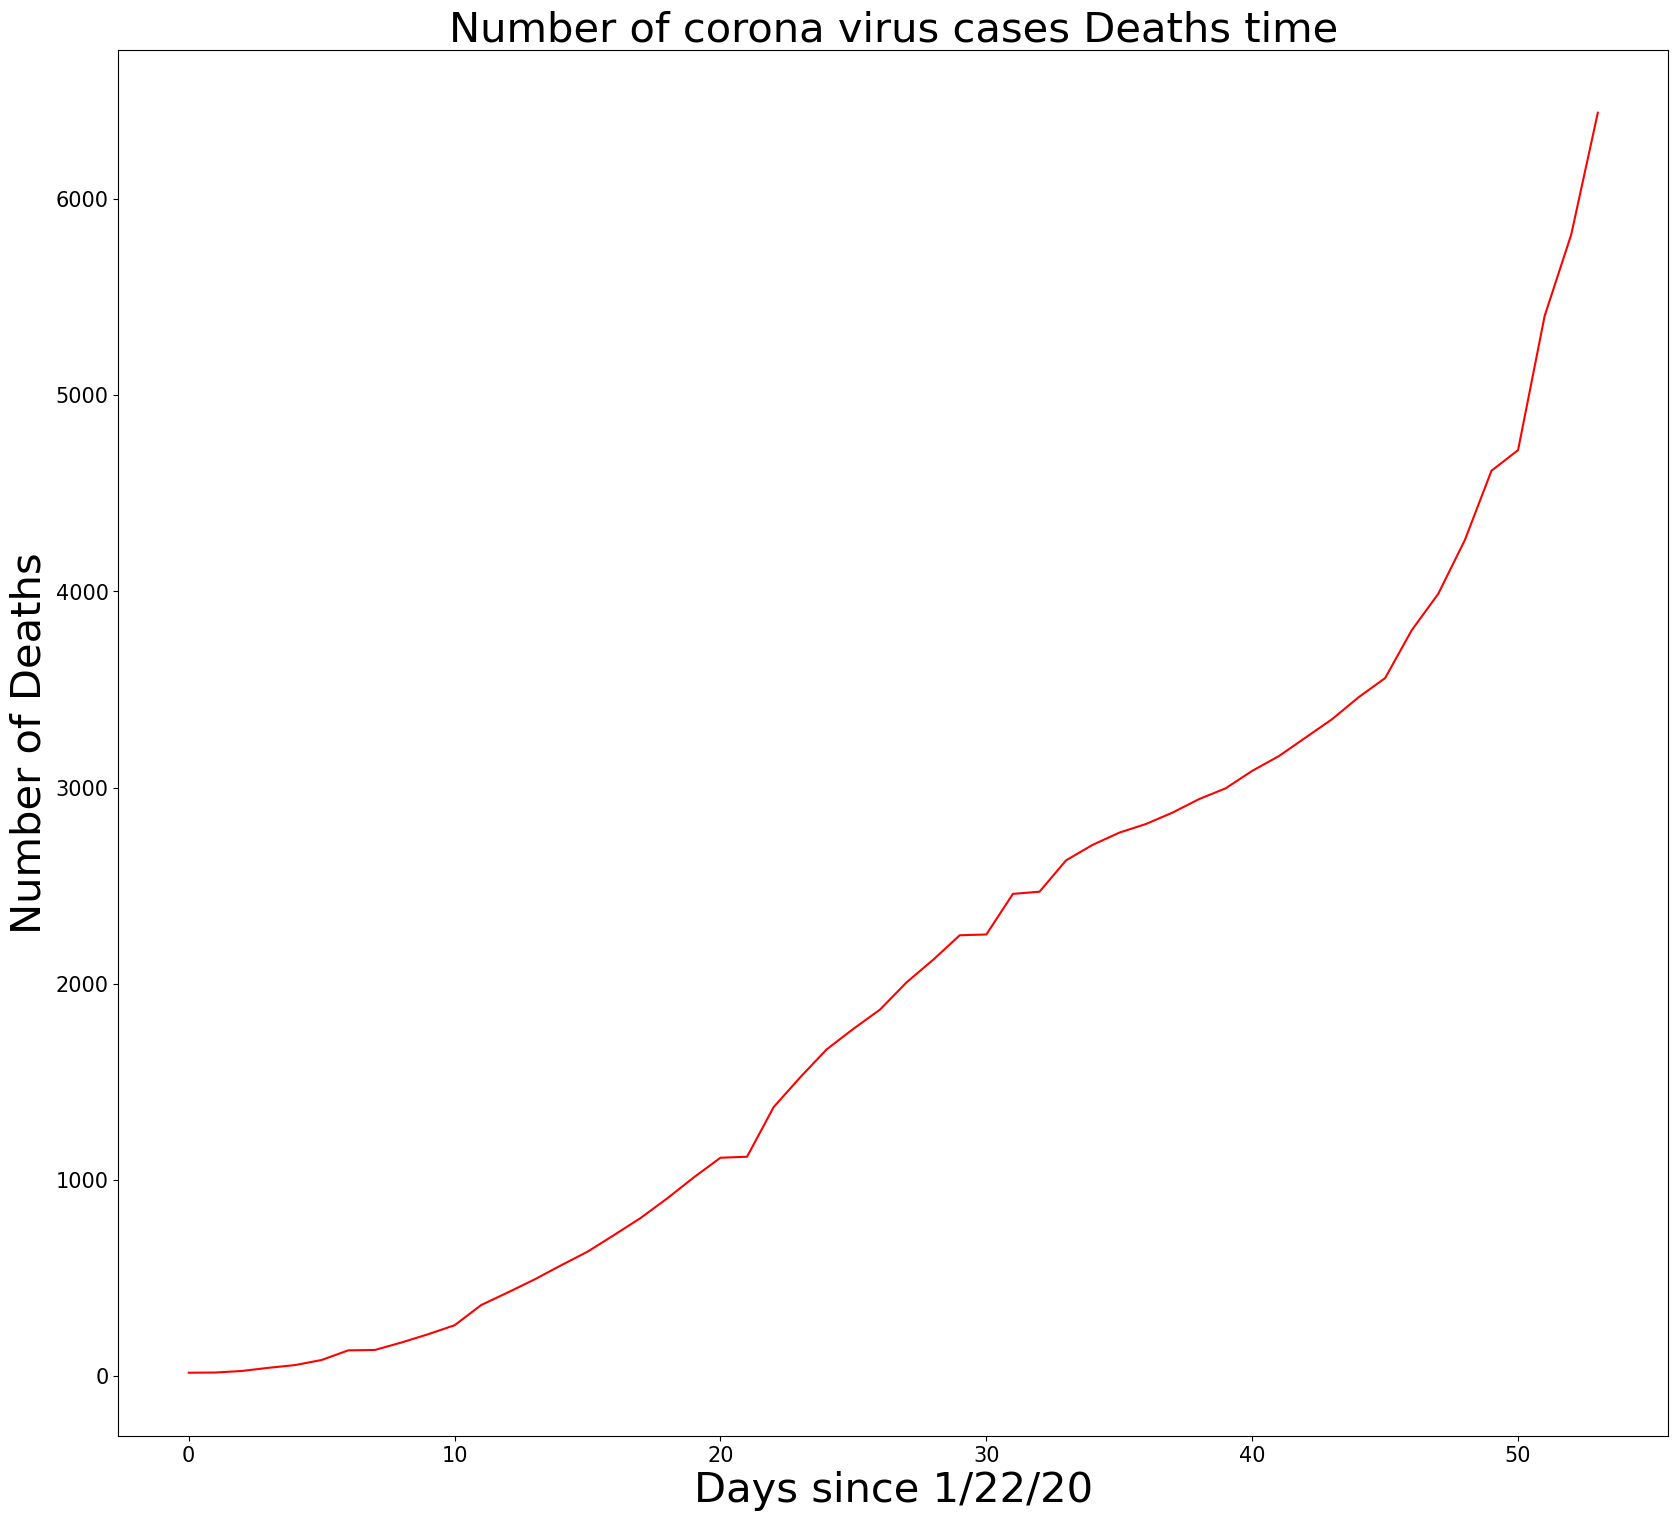

In [255]:
plt.figure(figsize=(20,18))
plt.plot(adjusted_dates,total_deaths,color='red')


plt.title("Number of corona virus cases Deaths time",size=30)
plt.xlabel('Days since 1/22/20',size=30)
plt.ylabel('Number of Deaths',size=30)

plt.yticks(size=15)
plt.xticks(size=15)
plt.show()


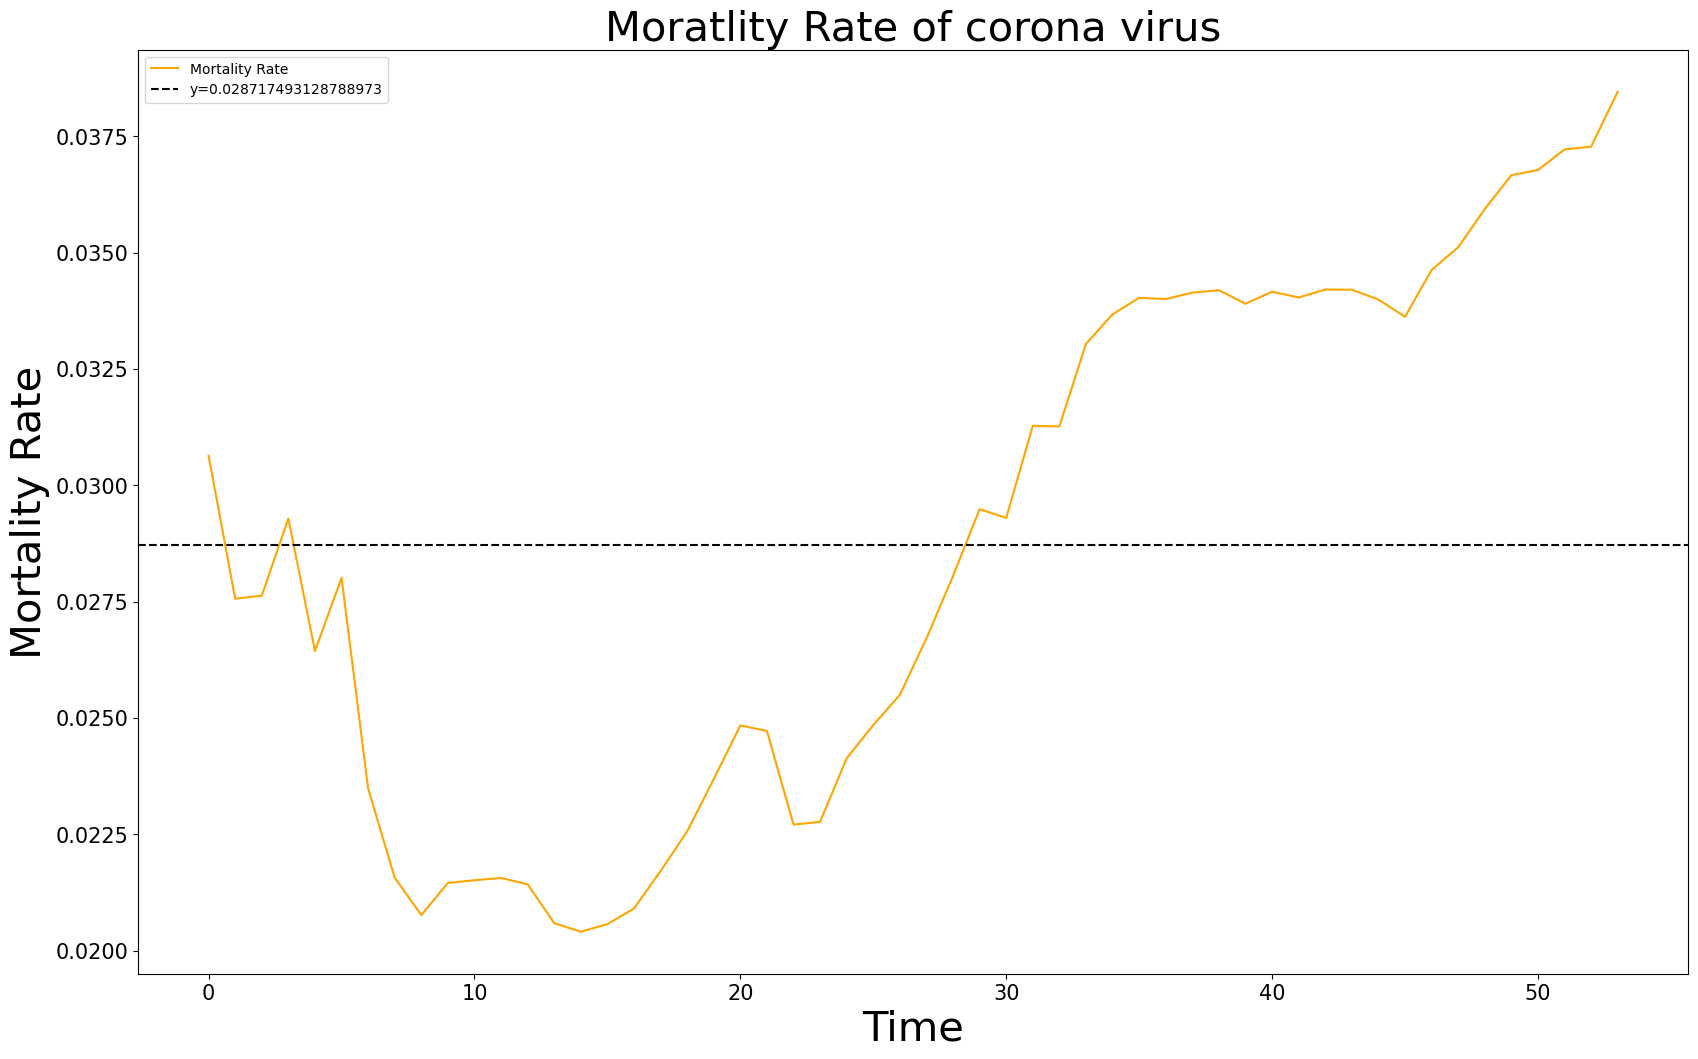

In [256]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color='orange')
plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')
plt.title('Moratlity Rate of corona virus' ,size=30)
plt.legend(['Mortality Rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time',size=30)
plt.ylabel('Mortality Rate',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


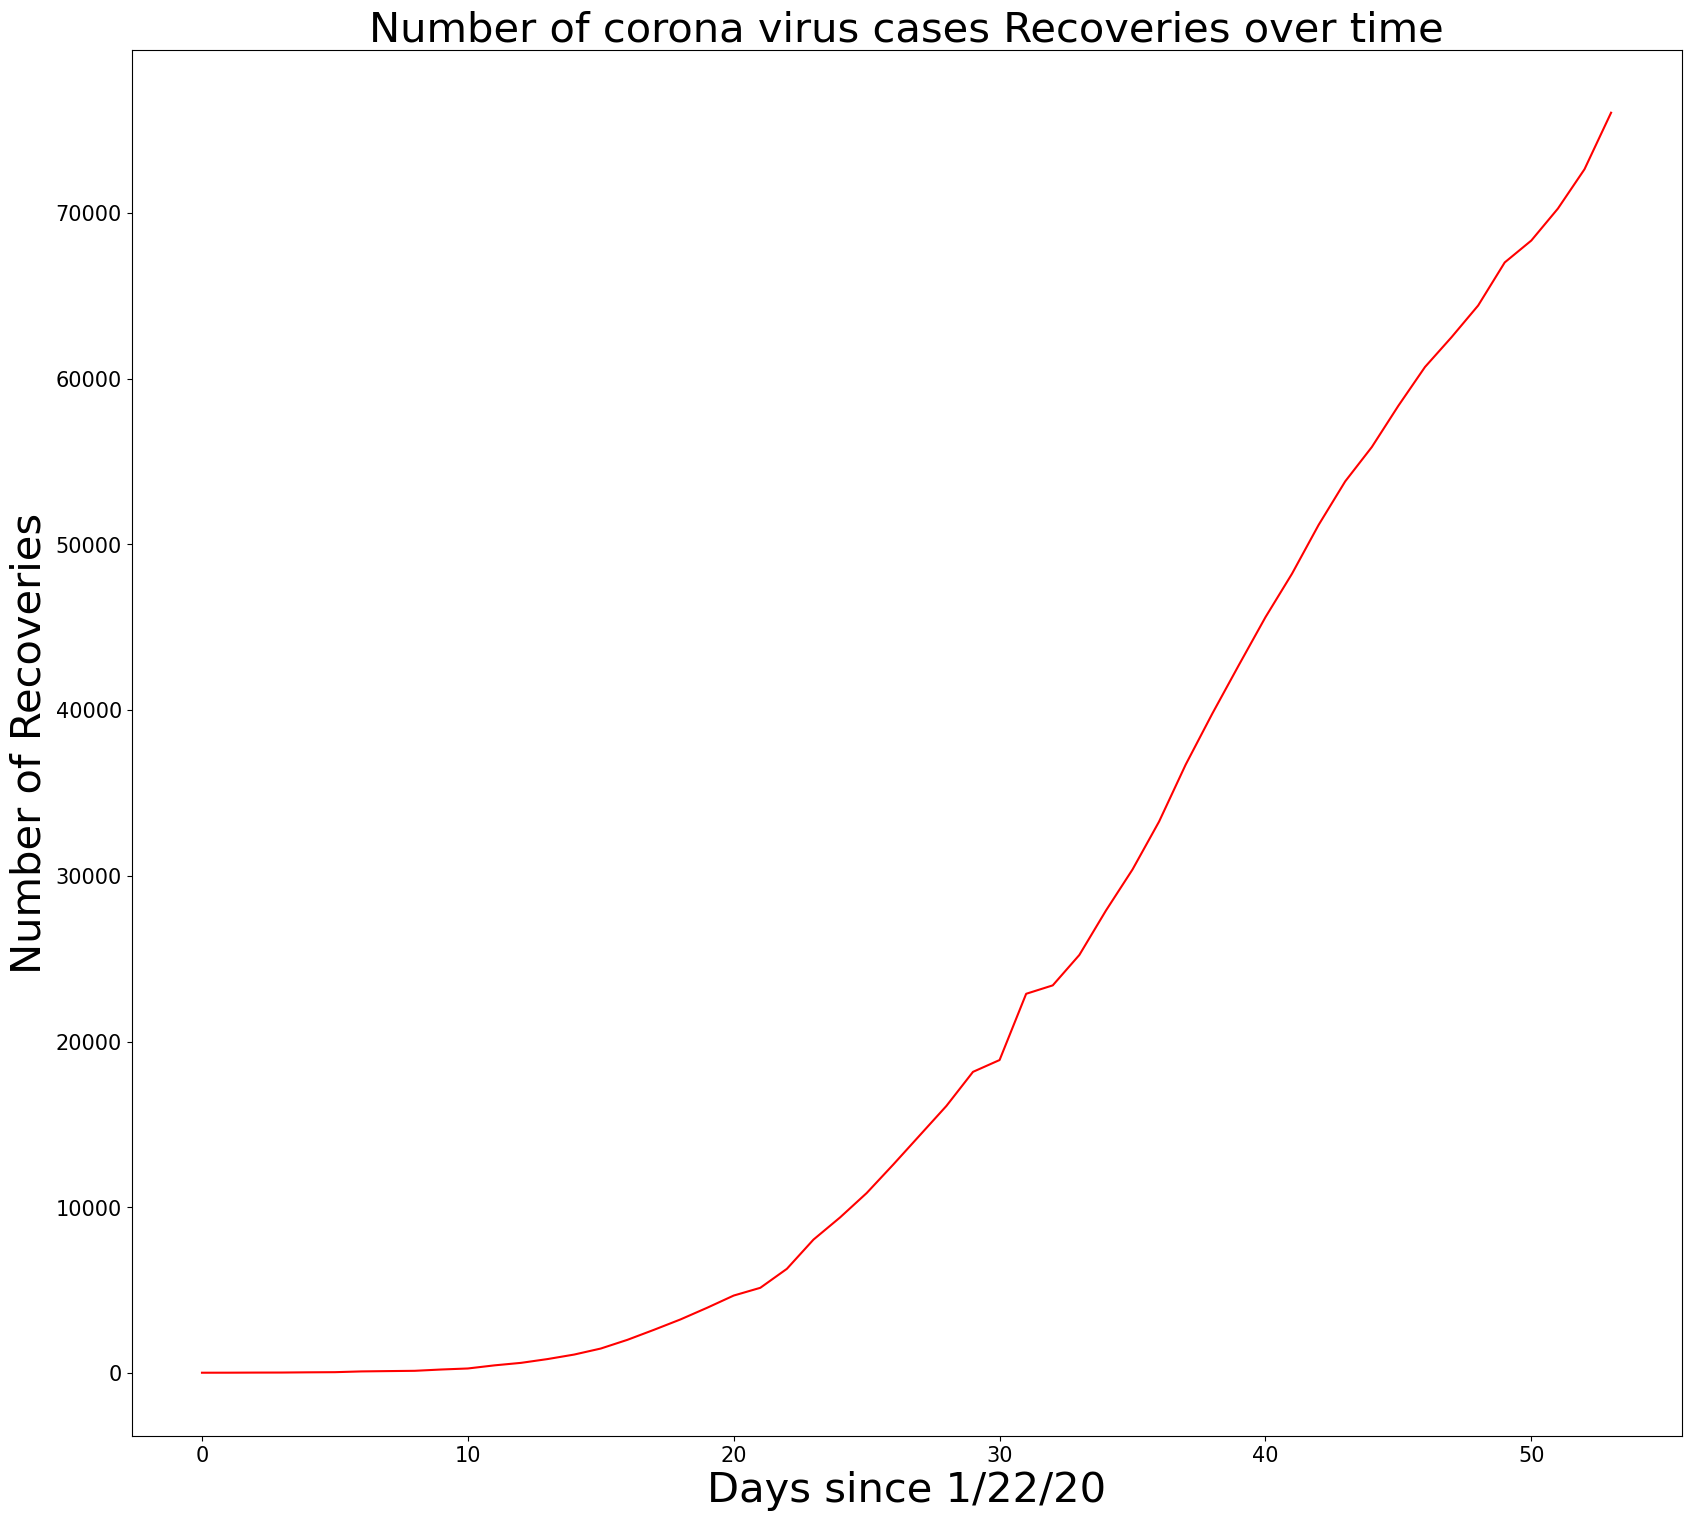

In [257]:
plt.figure(figsize=(20,18))
plt.plot(adjusted_dates,total_recovered,color='red')


plt.title("Number of corona virus cases Recoveries over time",size=30)
plt.xlabel('Days since 1/22/20',size=30)
plt.ylabel('Number of Recoveries',size=30)

plt.yticks(size=15)
plt.xticks(size=15)
plt.show()


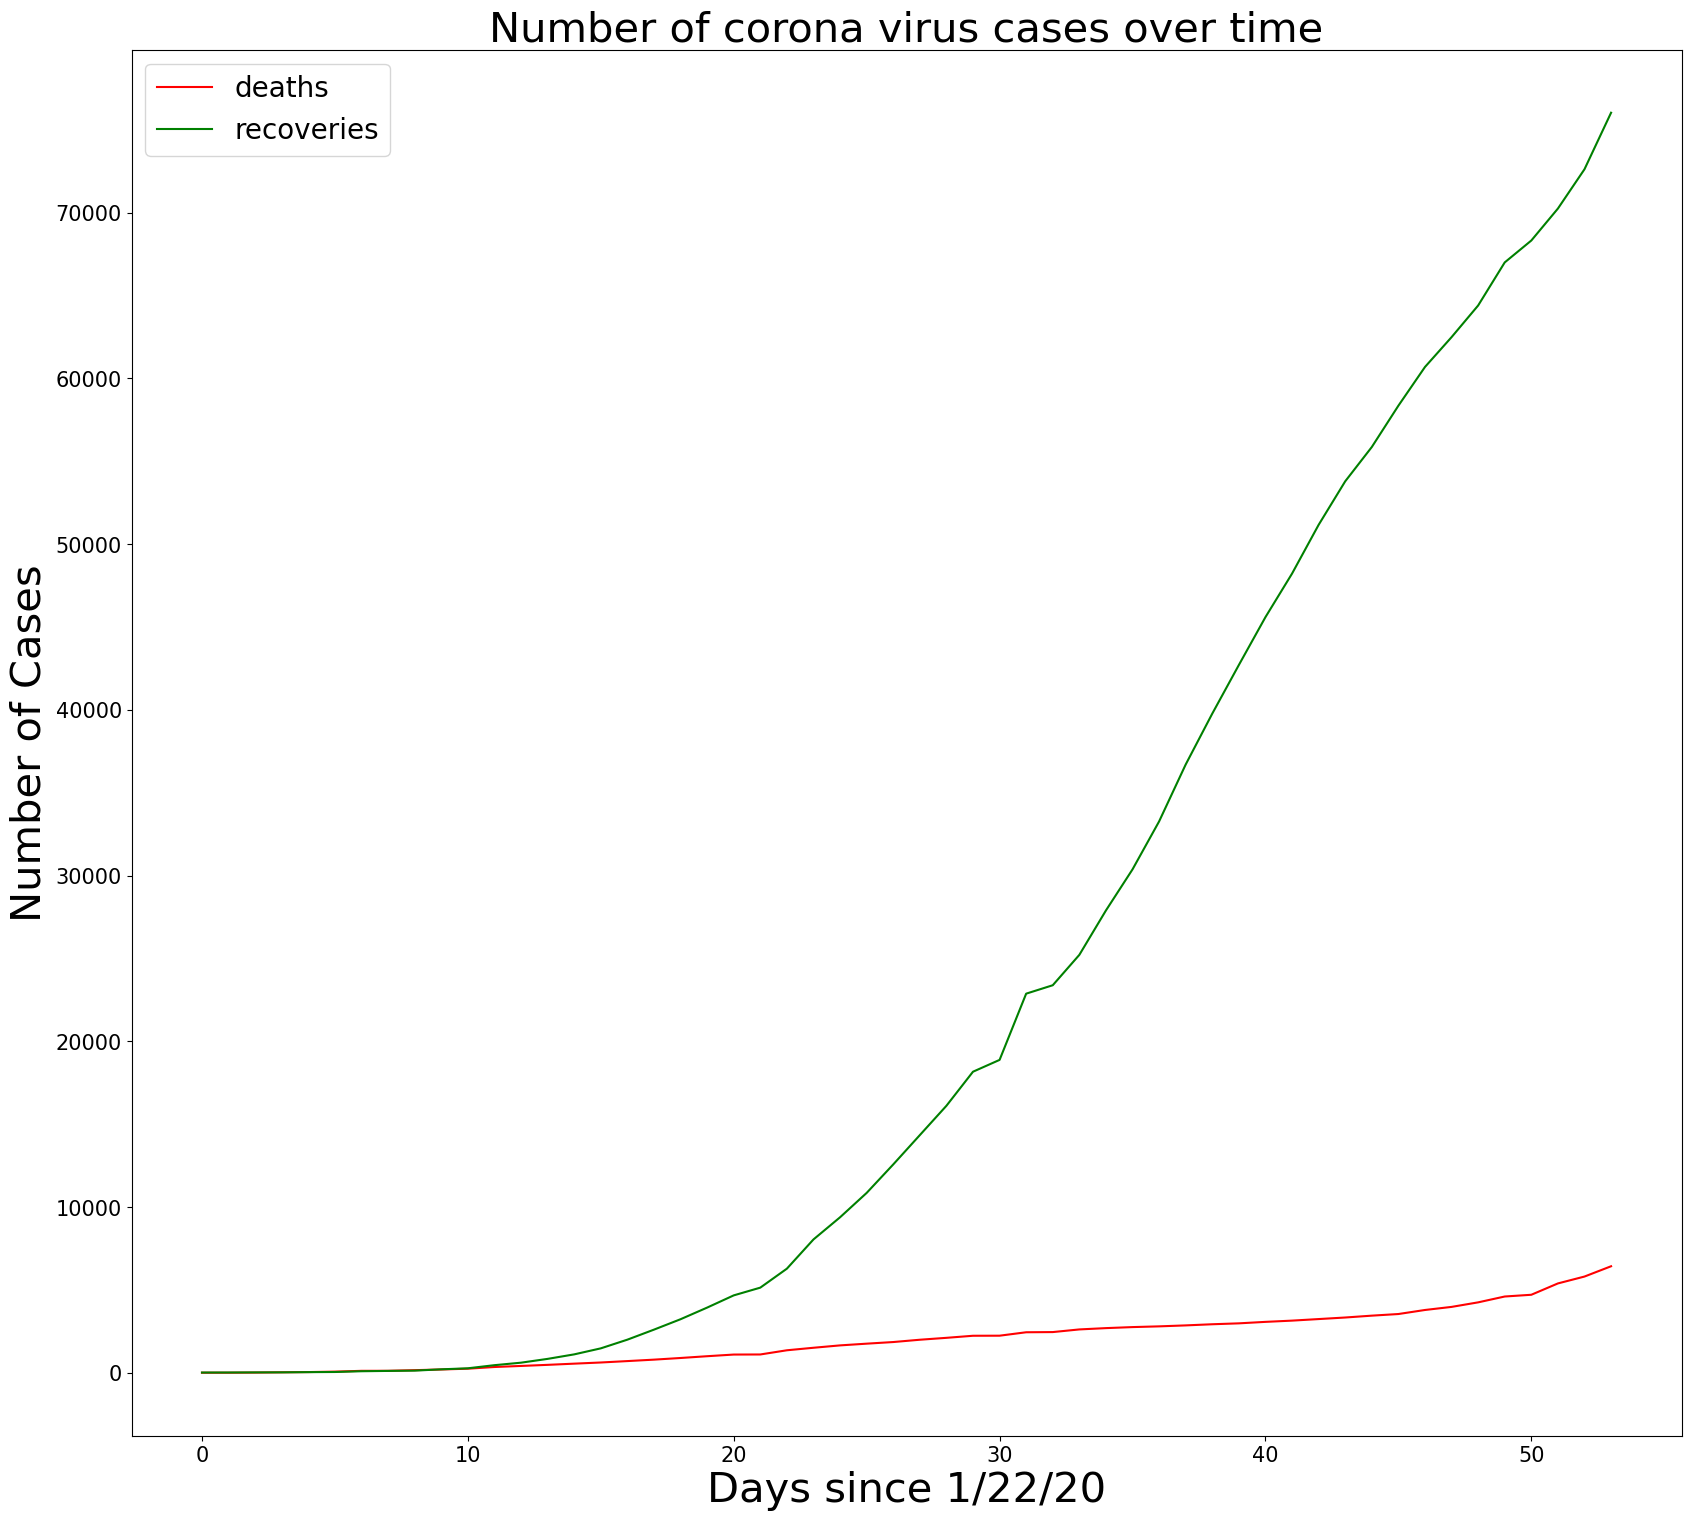

In [258]:
plt.figure(figsize=(20,18))
plt.plot(adjusted_dates,total_deaths,color='red')

plt.plot(adjusted_dates,total_recovered,color='green')
plt.legend(['deaths','recoveries'],loc='best',fontsize=20)


plt.title("Number of corona virus cases over time",size=30)
plt.xlabel('Days since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)

plt.yticks(size=15)
plt.xticks(size=15)
plt.show()


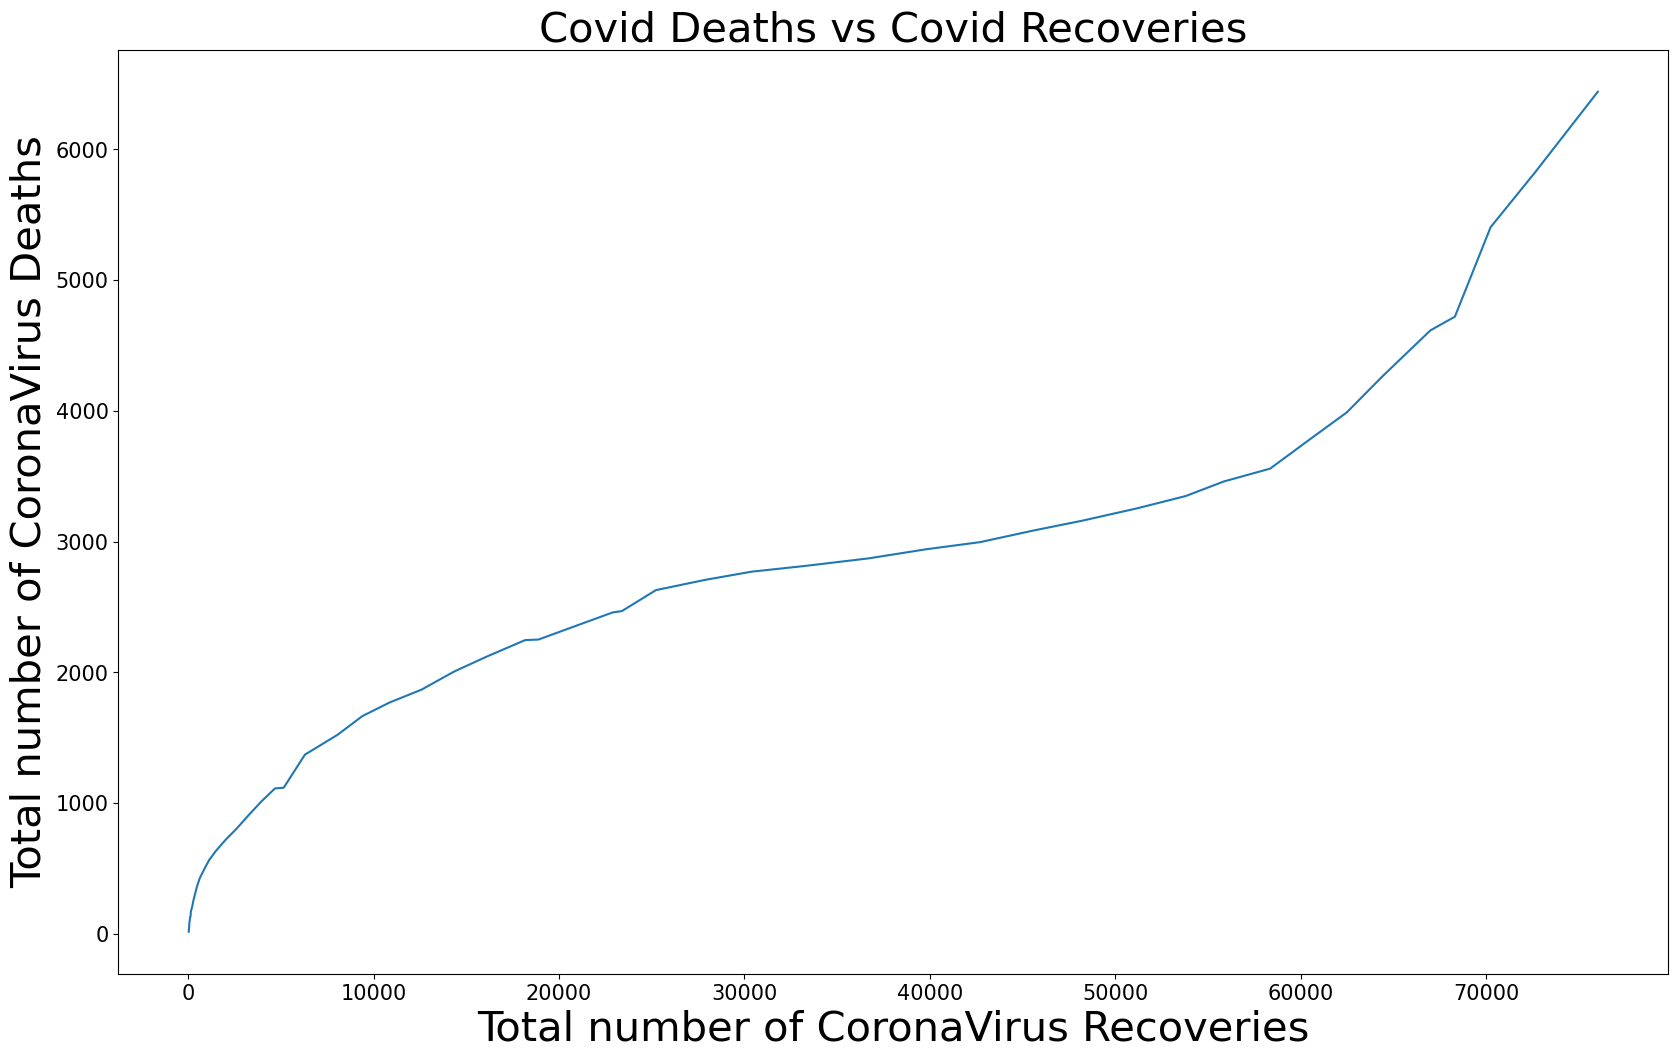

In [259]:
plt.figure(figsize=(20,12))
plt.plot(total_recovered,total_deaths)
plt.title('Covid Deaths vs Covid Recoveries',size=30)
plt.xlabel('Total number of CoronaVirus Recoveries',size=30)
plt.ylabel('Total number of CoronaVirus Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



In [260]:
from sklearn.metrics import accuracy_score

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Your predicted and actual values
svm_test_pred = np.array([119458.02451679, 125528.99706107, 131869.74716488, 138486.13955776,
                          145384.03896929, 152569.310129, 160047.81776646, 167825.42661123,
                          175908.00139284])
y_test_confirmed = np.array([105821, 109795, 113561, 118592, 125865, 128343, 145193, 156097, 167449])

# Calculate MAE
mae = mean_absolute_error(y_test_confirmed, svm_test_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_test_confirmed, svm_test_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R²
r2 = r2_score(y_test_confirmed, svm_test_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 16262.389241035558
Mean Squared Error (MSE): 284688600.405043
Root Mean Squared Error (RMSE): 16872.717635432742
R-squared (R²): 0.31259440679275374
